# Information Retrieval

Supongamos que tenemos 5 documentos:
    
    D1: Cebra Caballo
        
    D2: Caballo Cebra Cabra
        
    D3: Cabra Cabra Cebra Cabra
        
    D4: Cobra
        
    D5: Carpincho

Objetivo simple: Resolver una consulta puntual.

    Cabra: D2 D3
    
    Cobra: D4

Vamos a construir un __indice invertido__. Este indice tiene la forma 

| Termino | Documentos |
|---------|------------|
|     t1  |   d1,d2... |
|         |            |

Recorro todos los documentos e indico todos los términos y a que documento pertenecen

    Cebra 1
    Caballo 1
    Caballo 2
    Cebra 2
    Cabra 2
    Cabra 3 
    Cebra 3
    Cobra 4
    Carpincho 5
    
Ordenamos entonces por terminos y agrupamos los documentos en que aparecen
    
    Caballo: 1,2
    Cabra: 2,3
    Carpincho: 5
    Cebra: 1,2,3
    Cobra: 4
    
 En vez de guardar los terminos en el indice, vamos a guardarlos concatenados en una estructura aparte
 
 CaballoCabraCarpinchoCebraCobra
 
 0&emsp;&emsp;&emsp;7&emsp;&emsp;12&emsp;&emsp;&emsp;&thinsp;&thinsp;21&emsp;&emsp;26
 
En otra estructura vamos a guardar los punteros a los documentos a los cuales apunta cada termino

    122351234
    0 2 45  8
    
 Entonces en la tabla guardo el indice de donde comienza el termino, y los indices donde comienza el conjunto de documentos
 
| ptr Termino| ptr Documentos |
|--------|------------|
|     0  |   0        |
|     7  |   2        |
|     23 |   4        |
|     21 |   5        |
|     26 |   8        |

Para cada termino, en vez de guardar todos los numeros de documento, guardo el primer numero de documento y luego las distancias de los documentos subsiguientes en los que aparece

   Caballo: 1,2 $\rightarrow$ 1,1
    
   Cabra: 2,3 $\rightarrow$ 2,1
   
   Carpincho: 5 $\rightarrow$ 5
   
   Cebra: 1,2,3 $\rightarrow$ 1,1,1
   
   Cobra: 4 $\rightarrow$ 4
   
   __A__

## Codificacion de Punteros

### Unarios

Si yo quiero expresar un numero $n$ en unario, lo que voy a hacer es poner $n-1$ ceros seguidos de un $1$

$u(3) = 001$

$u(5) = 00001$


### Gamma (Esta es la que se usa por default)

$\gamma(x) = \lfloor log_{2}(x) \rfloor + 1 $ en unario __concat__ $x-2^{\lfloor log_{2}(x) \rfloor}$ en __binario__ de $\lfloor log_{2}(x)\rfloor$ bits

$\gamma(5) = 001$ concat $01$ = $00101$

### Delta

$\delta(x) = \lfloor log_{2}(x) \rfloor + 1$ en $\gamma$ __concat__ $x-2^{\lfloor log_{2}(x) \rfloor}$ en binario de $\lfloor log_{2}(x)\rfloor$ bits

$\delta(5) = 01101$

Volviendo a lo anterior, en lugar de guardar los números de documento concatenados, guardamos los gamma de los números 

$\gamma(1) = 1$

$\gamma(2) = 010$

$\gamma(3) = 011$

$\gamma(4) = 00100$

$\gamma(5) = 00101$


Entonces guardamos los documentos con las distancias concatenados

1101010010111100100

(1 1 2 1 5 1 1 1 4) (esto sale de __A__)

Generamos nuevamente la tabla con esta info 

| ptr Termino| ptr Documentos |
|--------|------------|
|     0  |   0        |
|     7  |   2        |
|     23 |   6        |
|     21 |   11       |
|     26 |   14       |


### Front Coding

| char $=$| char $\neq$ | ptr  | ptr doc |
|--------|------------|--------|---------|
|     0  |   7        |   0    | 0       | 
|     3  |   2        |   7    |    2    | 
|     2  |   7        |   9    |    6    | 
|     1  |   4        |   16   |    11   |
|     1  |   4        |   20   |    14   |

__0__caballo __7__ ra __9__ rpincho __16__ ebra __20__ obra


### Front Coding Parcial
Cada n cantidad de terminos se vuelve a empezar a poner el termino completo

| char $=$| char $\neq$ | ptr  | ptr doc |
|--------|------------|--------|---------|
|     0  |   7        |   0    |    0    | 
|     3  |   2        |   7    |    2    | 
|     2  |   7        |   9    |    6    | 
|     0  |   5        |   16   |    11   |
|     1  |   4        |   20   |    14   |

__0__ Caballo __7__ Ra __9__ Rpincho __16__ Cebra __21__ Obra

Si tengo 5 terminos y 5 documentos, en el peor de los casos tengo 25 punteros. En el caso del ejemplo tengo 9 punteros.

Terminos = 5 

Docs =  5

PTR = 9

$p = \frac{9}{5*5}$

### ------------------------------------------------------------------------------ 
Hasta aca ya puedo resolver consultas puntuales. Digamos que tengo la query

Q = "cabra cebra"

Guardo para cada termino los documentos y las posiciones en donde aparece

Caballo D1(2), D2(1)

Cabra D2(3), D3(1,2,4)

Carpincho D5(1)

Cebra D1(1), D2(2), D3(3)

Cobra D4(1)

y lo codificamos en forma 

Documento Cantidad Posicion Distancia Cantidad Posicion ... etc


## N-Gramas

Un N-grama es una secuencia de caracteres, y lo que vamos a hacer es ver que secuencia de caracteres comprende cada termino 

bigramas

Caballo $\rightarrow$ \\$C CA AB BA AL LL LO O\\$

Cabra $\rightarrow$ \\$C CA AB BR RA A\\$

Carpincho $\rightarrow$ \\$C CA AR RP PI IN NC CH HO O\\$

Cebra $\rightarrow$ \\$C CE EB BR RA A\\$

Cobra $\rightarrow$ \\$C CO OB BR RA A\\$

Lo que voy a tener es un indice invertido que dice, para cada bigrama los terminos en los que esta 

\\$C 1,2,3,4,5

CA 1,2,3

AB 1,2

BA 1

AL 1

LL 1

LO 1

O\\$ 1,3

BR 2,4,5

RA 2,4,5

A\\$ 2,4,5

AR 3

RP 3

PI 3

IN 3

NC 3

CH 3

HO 3

CE 4

EB 4

CO 5

OB 5

__Ahora ordenamos alfabeticamente__

\\$C 1,2,3,4,5

A\\$ 2,4,5

AB 1,2

AL 1

AR 3

BA 1

BR 2,4,5

CA 1,2,3

CE 4

CH 3

CO 5

EB 4

HO 3

IN 3

LL 1

LO 1

NC 3

O\\$ 1,3

OB 5

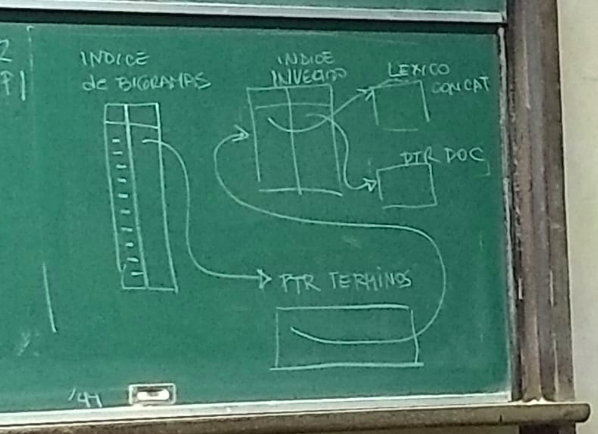

# Consultas Rankeadas

VW ( _keyword_ ) Golf +( _obligatorio_ ) GTI - ( _NO_ )Pelota Gti^2 ( _importancia_ ) 

## Bag of Words
Considera a cada documento como una bolsa de terminos. Entonces fija un puntaje para cada documento

puntaje = cantidad de terminos que aparecen en el documento

D1: Auto Auto Ford

D2: Auto Vw Motor Vw

D3: Golf VW Motor Golf VW

D4: Golf Golf Pelota

D5: Vw Gol Vento

D6: Auto...Ford...VW...Pelota

Entonces por ejemplo si tenemos la siguiente query

__Query__ = Auto VW Golf

resultan los puntajes

D1: Auto Auto Ford __1__

D2: Auto Vw Motor Vw __2__

D3: Golf VW Motor Golf VW __2__

D4: Golf Golf Pelota __1__

D5: Vw Gol Vento __1__

D6: Auto...Ford...VW...Pelota __2__


Entonces se devuelve en orden

D2,D3,D6,D1,D4,D5

## TF IDF: Term Frequency - Inverse Document Frequency

### TF: Frecuencia del termino en el documento
### IDF: Importancia del termino

Formas de representar TF:

0/1: Aparece o no aparece

$F_{T,D}$ (Cantidad de veces que aparece)

$Log F_{T,D}$ (Logaritmo de la cantidad de veces)


Formas de representar IDF:

1

$Log \frac{N+1}{F_{t}}$, donde $N=$ Cant de documentos y $F_{T}=$ Cant de documentos donde aparece el término T.

Volviendo al ejemplo anterior

IDF(Auto)= $Log \frac{6+1}{3}$ = 0.36

IDF(VW) = $Log \frac{7}{4}$ = 0.24 

TF IDF de un documento D

$\sum TF_{i,d} IDF_{i} = \sum TF_{i,d} Log \frac{N+1}{F_{Ti}}$

la sumatoria se realiza sobre cada termino de la query Q

Entonces para los documentos y la Query del ejemplo resulta:

D1: 2*0.36 = 0.72

D2: 1*0.36 + 2*0.24 = 0.84

D3: 2*0.54 + 2*0.24 = 1.54

D4: 2*0.54 = 1.08

D5: 1* 0.24 = 0.24

D6: 1*0.36 + 1*0.24 = 0.60

## BM25

$BM(D,Q) = \sum_{i=1}^{k} IDF(Q_{i}).\frac{F_{Qi,D}(K+1)}{F_{Qi,D}+K1(1-b+b\frac{|D|}{AVGDL})}$

(Esta sumatoria es para cada termino de la Query, y BM se define para el documento)


Donde

$F_{Qi,D}$ = Frecuencia de Qi en D

|D| = Cantidad de terminos en D

AVGDL = PRomedio de tamanios de los documentos

K1 y b = hiperparametros

K1 en general $\in [1,2:2]$ 

b = 0.75 $\rightarrow$ BM25

b= 1 $\rightarrow$ BM11

b = 0 $\rightarrow$ BM15

Para el caso del ejemplo

BM25 D1 = 0.8

## Método del Coseno

$\frac{<Q,D>}{|Q||D|}$

Se define un vector cuya dimension es la cantidad de terminos diferentes que hay entre todos los documentos, cada posicion correspondiendo a un termino, y se pone en cada componente la cantidad de apariciones del termino 

D1 = (2,1,0,0,0,0,0,0)

D2 = (1,0,0,0,1,0,0,2)

Q = (1,0,0,1,0,0,0,1) La query se define de la misma forma, ubicando los terminos que figuran en la query. Si hay un modificador como ^2,multiplicando por 2 la componente (por ejemplo).

Entonces, <Q,D> es un producto interno entre el vector que representa la Query y cada Documento.


## LSI (Indexacion Semántica Latente)

SVD Sobre la matriz de documentos

K Conceptos
(c.l. de algunos terminos que por alguna razón estan relacionados)

## Evaluación de consultas

Precisión: Cantidad de documentos relevantes recuperados sobre el total de docs recuperados. (Relacionado con los falsos positivos).

Recall: Cantidad de documentos relevantes recuperados sobre el total de docs relevantes. (Relacionado con los falsos negativos).

## F Score

Promedio armónico de P y R

$F_{\beta} = \frac{(\beta + 1)^{2}.P.R}{(\beta^{2}.P)+R}$

$F_{1} = \frac{2.P.R}{P + R}$

$\beta = 2$ Recall > Precision

$\beta = 0.5$ Precision > Recall

## Precisión interpolada

MAP (Mean Average Precision)

## Learning To Rank

Vector de pesos que le doy a cada feature respecto de la query, como por ejemplo, que un término aparezca en el título de un documento. 

(w1,w2,w3,....,wk)

Rank(D) = W * Fd (Features de D)

-PointWise

-PairWise

-ListWise

# Signature Files

Buscar en todos los documentos en un tiempo razonable no es viable

La idea es tener una cierta cantidad __b__ de funciones hashing

Por ejemplo 

$b = 3$ de 0 - 7 bits (8 valores posibles)

h1(cebra) = 0

h2(cebra) = 3

h3(cebra) = 5

Entonces el signature de este termino es 10010100 (poniendo 1 en los indices correspondientes al hashing)

h1(caballo) = 6

h2(caballo) = 5

h3(caballo) = 6

Entonces el signature de este termino es 00000110

Entonces el signature para un documento es el OR BITWISE entre las signatures de los terminos que lo componen

Scebra = 10010100 OR Scaballo = 00000110

$\rightarrow$ SD1 = 10010110

Entonces si tengo una __Query Q = Caballo $\rightarrow$ 00000110__

Busco los documentos que tienen los bits 5 y 6 encendidos.

Este metodo puede generar __falsos positivos__.

Por ejemplo

h1(cabra) = 2

h2(cabra) = 6

h3(cabra) = 5

$\rightarrow$ 00100110

D1 10010110

D2 01011000

D3 11101000

D4 00101101

D5 10000011

Esto se suele guardar transpuesto, tipo 

__b1__ 1 0 1 0 1

__b2__ 0 1 1 0 0

__b3__ 0 0 1 1 0

__b4__ 0 1 1 1 0

__b5__ 1 0 0 1 0

__b6__ 1 0 0 0 1

__b7__ 0 0 0 1 1


De tal forma que, si para que un documento sea candidato, necesita tener los bits 5 y 6 encendidos, simplemente me fijo en las filas 5 y 6 los documentos que tienen ambos bits encendidos.

Lo otro que se puede hacer es generar un bitmap que indique que terminos aparecen en cada documento

|           | D1 | D2 | D3 | D4 | D5 |
|-----------|----|----|----|----|----|
| Caballo   | 1  | 1  | 0  | 0  | 0  |
| Cabra     | 0  | 1  | 1  | 0  | 0  |
| Carpincho | 0  | 0  | 0  | 0  | 1  |
| Cebra     | 1  | 1  | 1  | 0  | 0  |
| Cobra     | 0  | 0  | 0  | 1  | 0  |

## EJERCICIO 

Se tienen los siguientes documentos 

D1: Cordero Sal Pimienta Romero

D2: Cerdo Cordero Sal Cordero

D3: Sal Cerdo Limon 

D4: Cordero Entraña

D5: Pimienta Papa Cordero Pimienta

D6: Cordero Cordero Cordero Cordero 

 

a) Dada la consulta Q = "Cordero Pimienta", dar el resultado de la consulta rankeada usando TF IDF 

b) Considerando como relevantes los documentos que no tienen otra carne que no sea Cordero ( O SEA SOLO CORDERO), calcular recall, precision. 

Resolucion 

__a)__ IDF Cordero e IDF Pimienta

$ IDF = Log \frac{N+1}{Ft} $

$ N = 6 $

Ft (Cordero) = 5

Ft (Pimienta) = 2

IDF Cordero = $log \frac{7}{5} = 0.146$

IDF Pimienta = $log \frac{7}{2} = 0.544$

Calculo entonces el TF IDF para cada documento

Para D1 = $1*0.146 + 1*0.544 = 0.69$

Para D2 = $2*0.146 = 0.292$

Para D4 = $1*0.146 = 0.146$

Para D5 = $1*0.146 + 2*0.544 = 1.234$

Para D6 = $4*0.146 = 0.584$

Entonces el resultado ordenado D5,D1,D6,D2,D4

No se incluye D3 porque no tiene NINGUNO de los terminos de la consulta.

__b)__ 

Precisión: Cantidad de documentos relevantes recuperados sobre el total de docs recuperados. (Relacionado con los falsos positivos).

Recall: Cantidad de documentos relevantes recuperados sobre el total de docs relevantes. (Relacionado con los falsos negativos).

F1 = $\frac{2PR}{P+R} = \frac{6}{8} = 0.75$

Precision = $\frac{3}{5} = 0.6$

Recall = $\frac{3}{3} = 1$

### OTRO EJERCICIO 

D1: Batman Joker Batman Pinguino

D2: Acertijo Gordon Joker

D3: Batman Acertijo

D4: Pinguino Gatubela Barbara 


Construyo un indice invertido

Batman 1

Joker 1

Pinguino 1

Acertijo 2

Gordon 2

Joker 2

Batman 3

Acertijo 3

Pinguino 4

Gatubela 4

Barbara 4

__Ordeno esto por termino de forma alfabetica__

Acertijo 2

Acertijo 3

Barbara 4

Batman 1

Batman 3

Gatubela 4 

Gordon 2

Joker 1

Joker 2

Pinguino 1

Pinguino 4

__Entonces acomodo esto por apariciones y luego codifico a distancias__

Acertijo 2,3 $\rightarrow$ 2,1

Barbara 4 $\rightarrow$ 4

Batman 1,3 $\rightarrow$ 1,2

Gatubela 4 $\rightarrow$ 4

Gordon 2 $\rightarrow$ 2

Joker 1,2 $\rightarrow$ 1,1

Pinguino 1,4 $\rightarrow$ 1,3

Como el ejercicio pide una cantidad fija de bits, utilizo 2 bits (debido a que tengo que representar distancias de 1 a 4)

|cod | dist| 
|----|---|
| 00 | 1 |
| 01 | 2 |
| 10 | 3 |
| 11 | 4 |

Tengo en un archivo aparte los terminos concatenados

(0)Acertijo(8)Barbara(15)Batman(21)Gatubela(29)Gordon(35)Joker(40)Pinguino

En otro archivo tengo concatenadas las apariciones y distancias codificadas con la cantidad fija de bits

(0)0100(4)11(6)0001(10)11(12)01(14)0000(18)0010

Entonces tengo punteros a terminos concatenando y punteros a documentos en las estructuras indicadas arriba

| PTR Termino | PTR Documento |
|-------------|---------------|
| 0           | 0             |
| 8           | 4             |
| 15          | 6             |
| 21          | 10            |
| 29          | 12            |
| 35          | 14            |
| 40          | 18            |

Los punteros de esta tabla deben tener longitud fija.


Ahora quiero resolver la query "Batman Pinguino"

Para hallar los documentos donde aparece batman, hago busqueda binaria sobre la tabla de arriba para hallar los punteros a documento del termino "Batman", considerando que los terminos estan ordenados de forma alfabetica. 

Batman = PTR 15. Sabemos que tiene punteros a documentos entre las 6 y la 9 (esta info tambien sale de la tabla). Entonces son 2 punteros que vamos a leer 

Los documentos son 00, 01. Esto lo traducimos con nuestro codigo, y resulta ser 1,2. Como sabemos que estamos almacenando distancias, esto en realidad, es Documento 1 y Documento 3. 

Tenemos que repetir el proceso con Pinguino. Los punteros son el 00 y el 10, que resulta ser 1,3, lo cual se traduce a Documento 1 y Documento 4.

Los candidatos a respuesta son la intersección de los documentos devueltos para cada término. Ahora tengo que entrar a mano en cada candidato y fijarme que la frase "Batman Pinguino" aparezca en el orden correcto.

__c)__ Podría agregar, además de el documento en donde aparece, la posición donde aparece. Esto permite verificar que las posiciones efectivamente aparezcan en el orden adecuado.